In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

DATA_PATH='hms-harmful-brain-activity-classification/'
EEG_PATH='train_eegs/'
SPEC_PATH='train_spectrograms/'
PROCESSED_DATA_PATH=''

In [3]:
train = pd.read_csv(f'{DATA_PATH}train.csv')
train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


Dataframe description

In [4]:
rows, columns = train.shape
rows, columns

(106800, 15)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [6]:
train.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [11]:
# categorical columns
# find the categorical columns using the datatype
train.select_dtypes('object').describe()

,expert_consensus
count,106800
unique,6
top,Seizure
freq,20933


Unique EEG, Spectrogram, label, and patient IDs

In [12]:
print("Number of EEG IDs: ", train.eeg_id.nunique())
print("Number of Spectrogram IDs: ", train.spectrogram_id.nunique())
print("Number of Label IDs: ", train.label_id.nunique())
print("Number of Patient IDs: ", train.patient_id.nunique())

Number of EEG IDs:  17089
Number of Spectrogram IDs:  11138
Number of Label IDs:  106800
Number of Patient IDs:  1950


Expert Consensus

In [13]:
# What are the possible conditions
train.expert_consensus.unique()

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

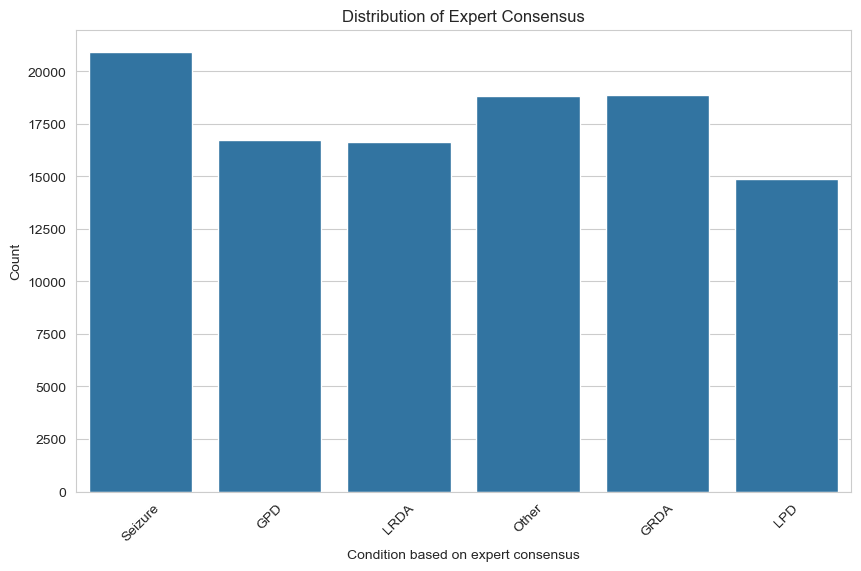

In [16]:
# how many instances of different conditions
plt.figure(figsize=(10,6))  # set the figure size
sns.countplot(data=train, x = "expert_consensus")
plt.title("Distribution of Expert Consensus")
plt.ylabel("Count")
plt.xlabel("Condition based on expert consensus")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

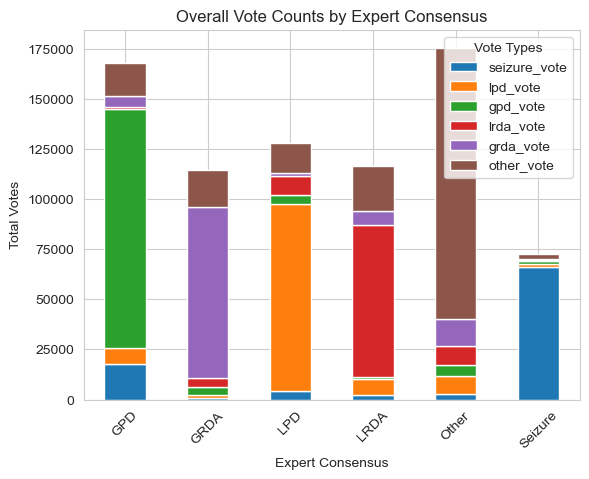

In [19]:
# What is the spread of votes in each of the conditions


plt.figure(figsize=(12, 8))
train.groupby('expert_consensus')[vote_cats].sum().plot(kind='bar', stacked=True)
plt.title('Overall Vote Counts by Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Vote Types')
plt.show()

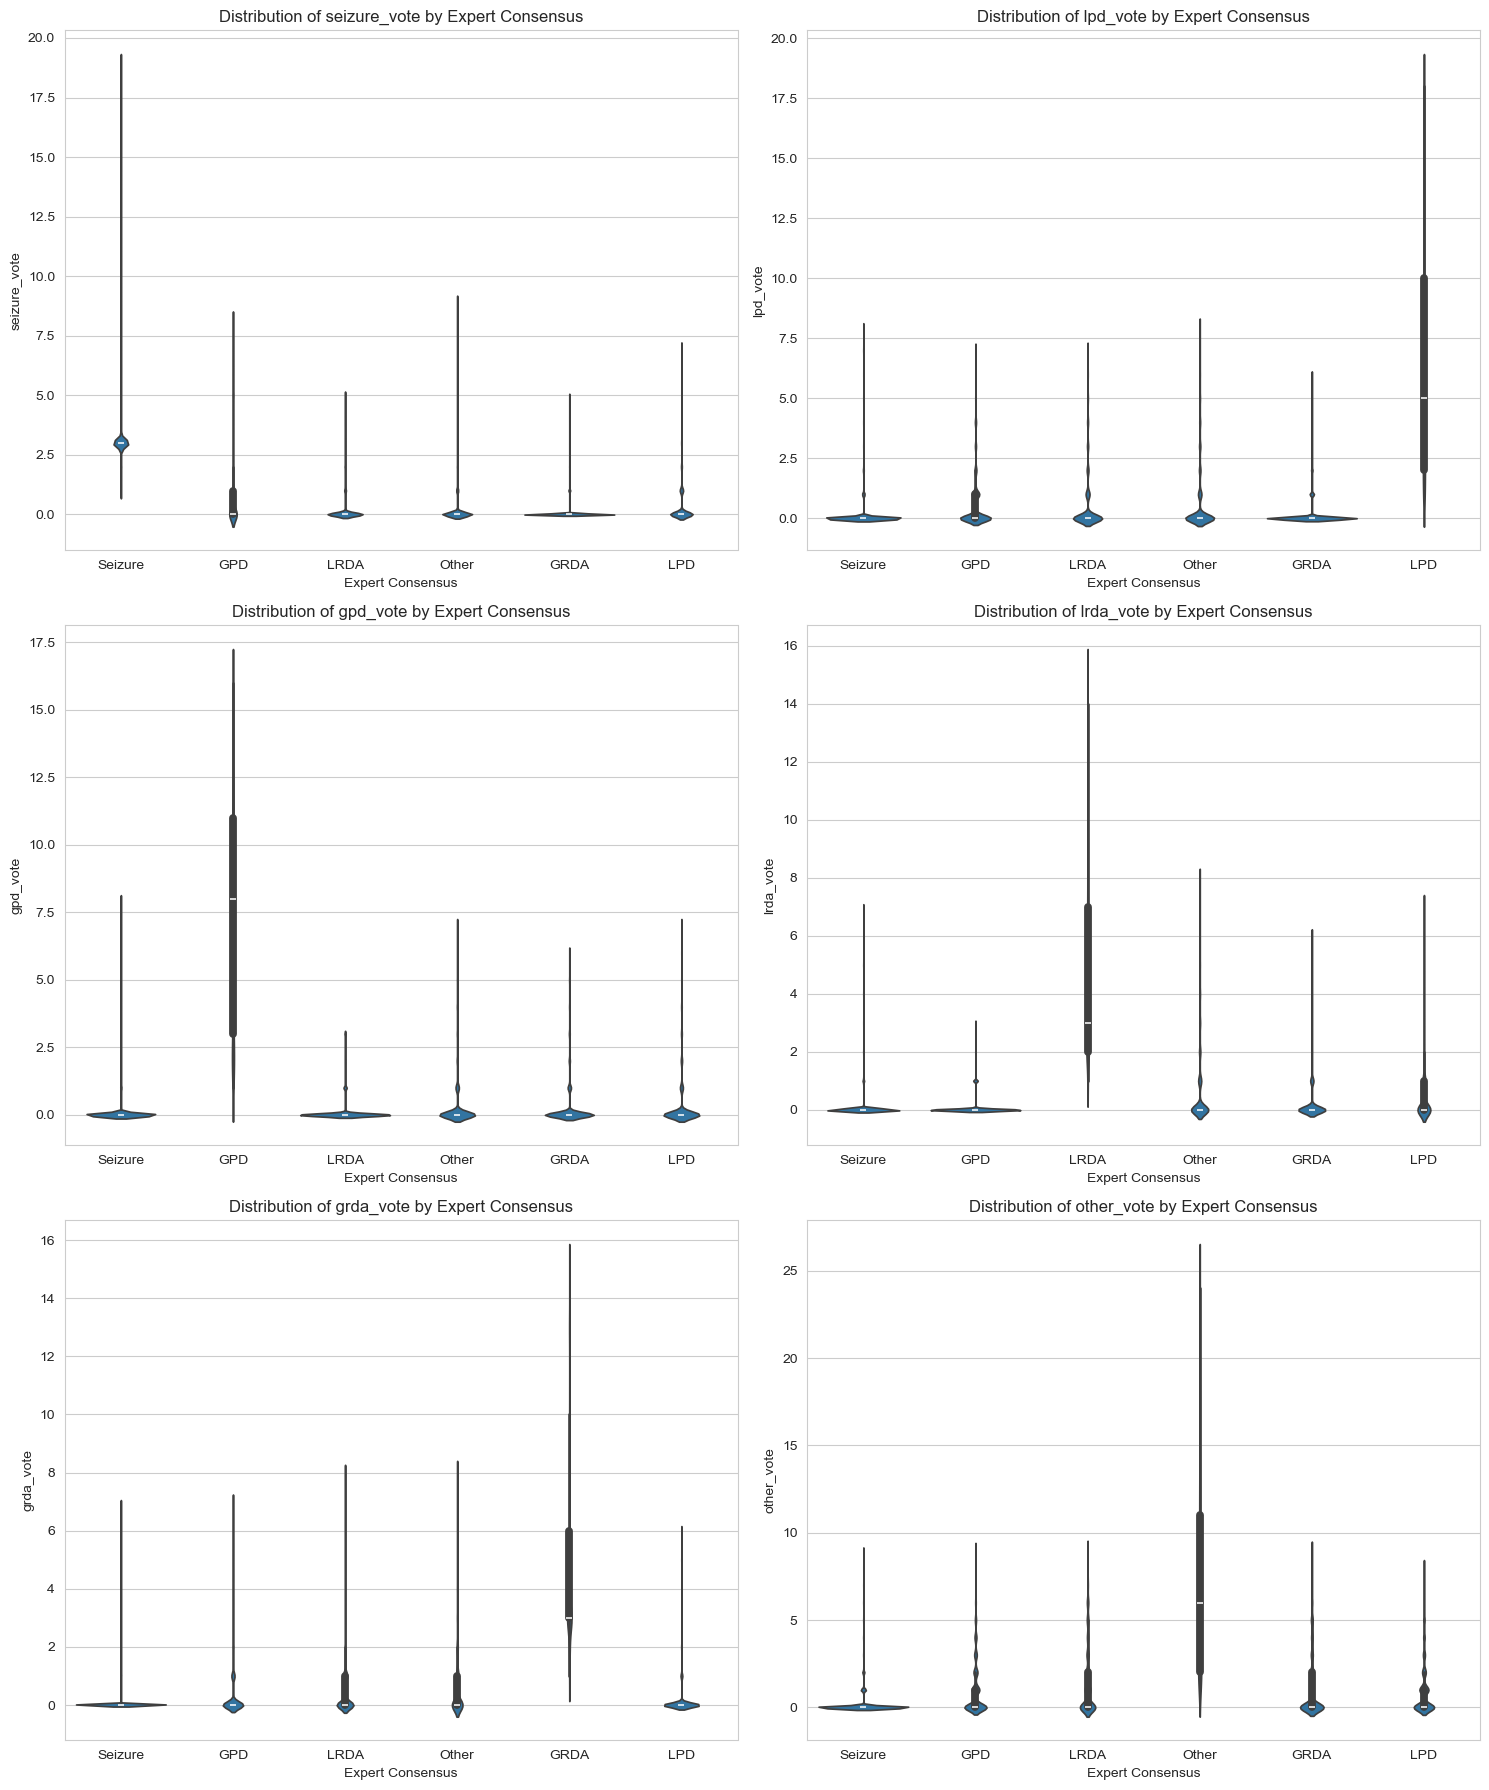

In [20]:
# range of <>_votes for each of the conditions
vote_cats = ["seizure_vote", "lpd_vote", "gpd_vote", "lrda_vote", "grda_vote", "other_vote"]

plt.figure(figsize=(15,18))
for i, cat in enumerate(vote_cats,1):
    plt.subplot(3,2,i)
    sns.violinplot(train, x = "expert_consensus", y = cat)
    plt.xlabel("Expert Consensus")
    plt.title(f'Distribution of {cat} by Expert Consensus')


plt.tight_layout()
plt.show()

Seems like in seizure cases, its generally less number of experts involved in consensus (median = 3) as compared to other conditions

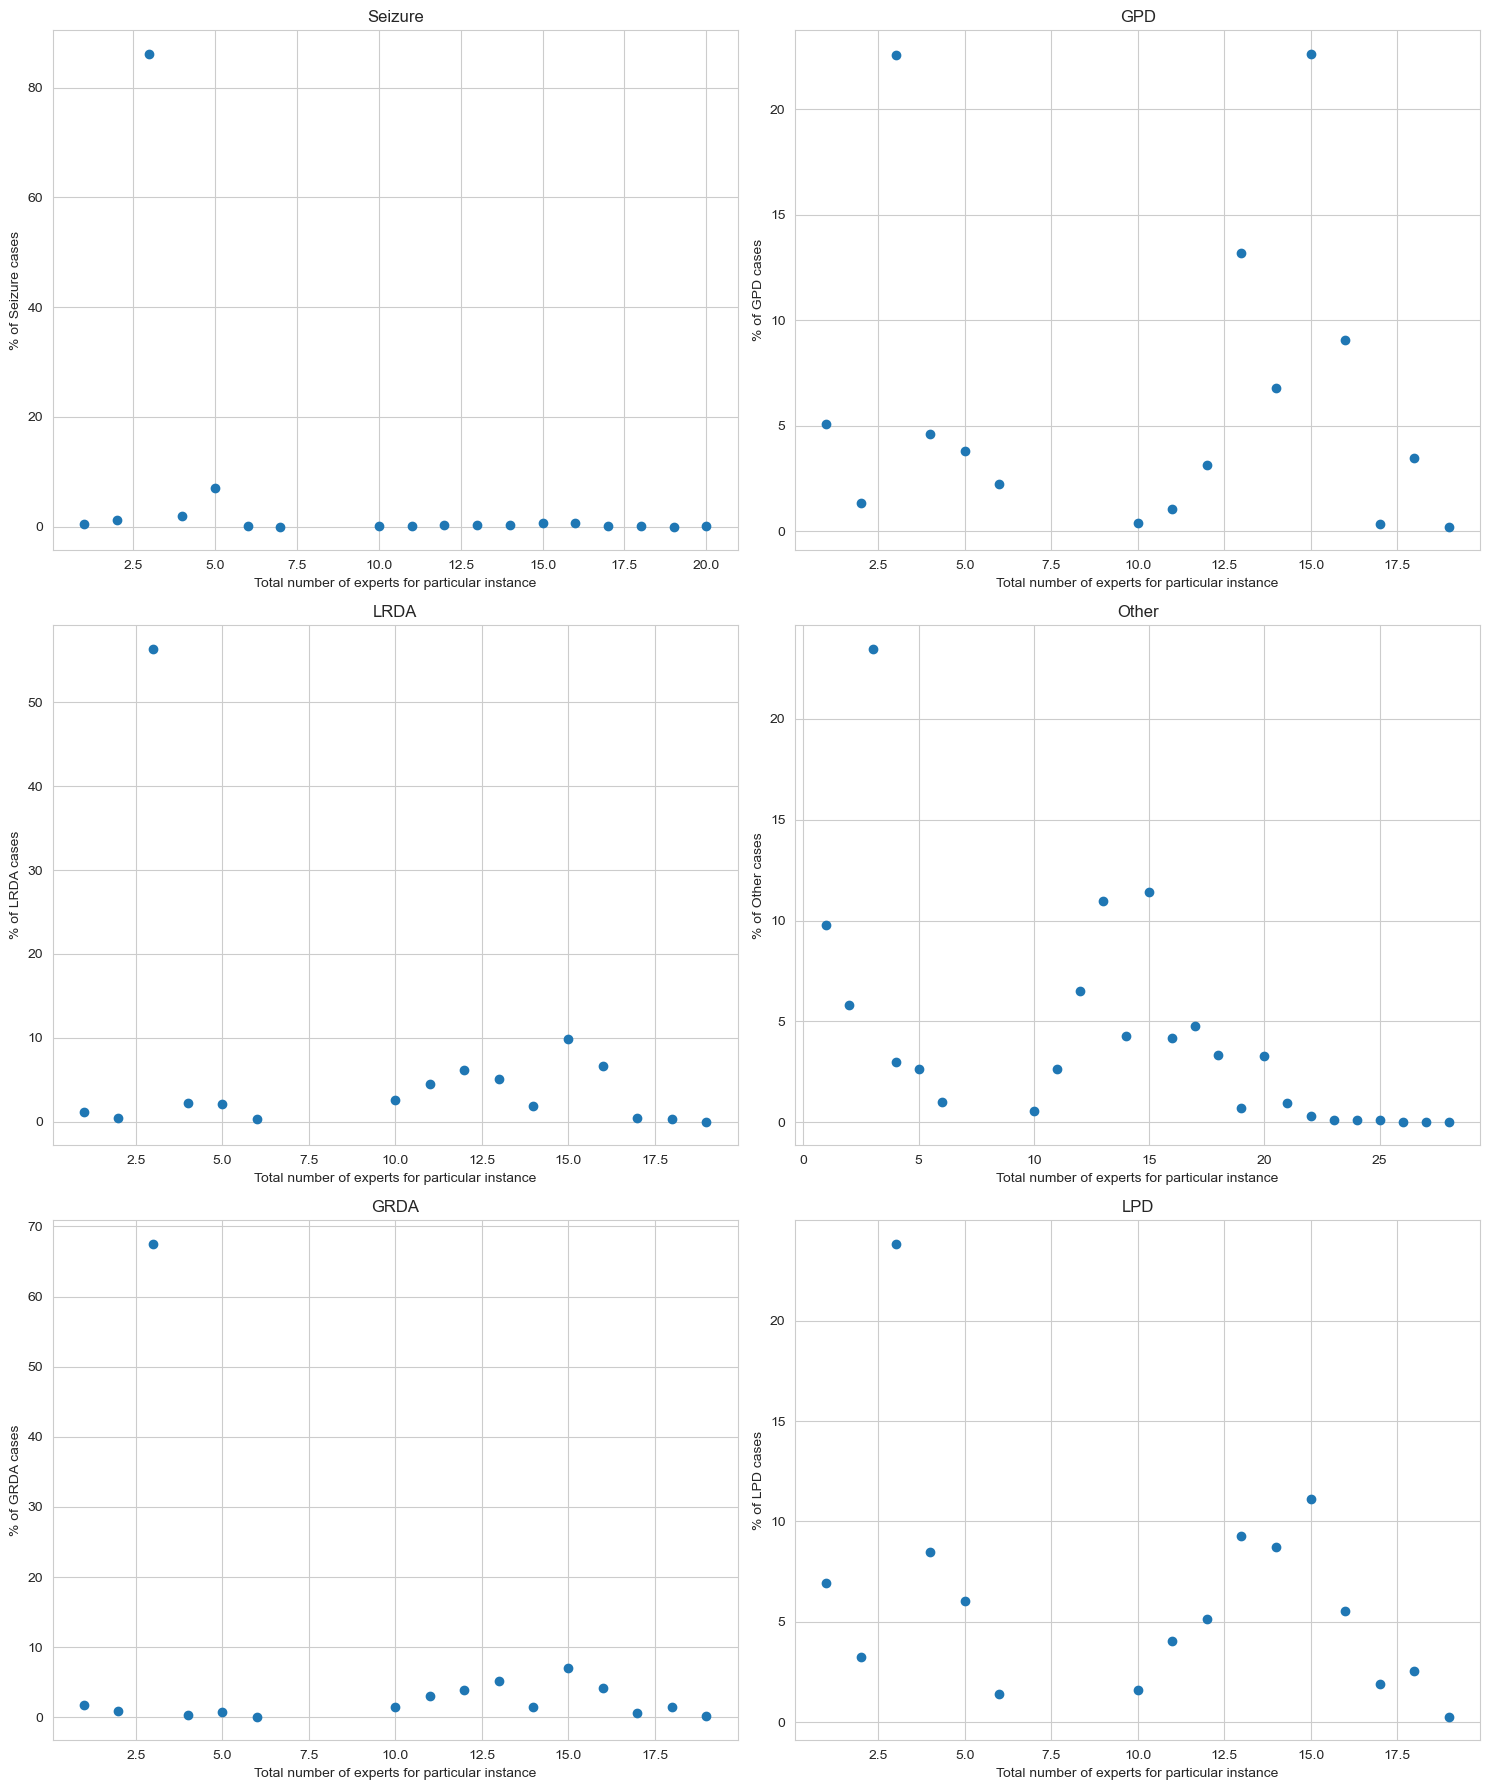

In [22]:
plt.figure(figsize=(15,18))
for i, cat in enumerate(list(train.expert_consensus.unique()),1):
    plt.subplot(3,2,i)
    df = (train.loc[train.expert_consensus == cat][vote_cats].sum(axis=1).value_counts()*100/train.expert_consensus.value_counts()[cat]).to_frame()
    plt.scatter(df.index, df['count'])
    plt.xlabel("Total number of experts for particular instance")
    plt.ylabel('% of ' + cat + ' cases')
    plt.title(cat)

plt.tight_layout()
plt.show()

The following table shows the count of expert groups by group size and by expert consensus. 

In [29]:
vote_cats = ["seizure_vote", "lpd_vote", "gpd_vote", "lrda_vote", "grda_vote", "other_vote"]
df_train=pd.read_csv(f'{DATA_PATH}train.csv')
df_train['expert_group_size']=df_train[vote_cats].sum(axis=1)
df_train.pivot_table(index='expert_consensus', columns='expert_group_size', values='eeg_id', aggfunc='count')

expert_group_size,1,2,3,4,5,6,7,10,11,12,...,19,20,21,22,23,24,25,26,27,28
expert_consensus,,,,,,,,,,,,,,,,,,,,,
GPD,851.0,226.0,3771.0,767.0,636.0,374.0,NaN,66.0,175.0,522.0,...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRDA,337.0,184.0,12731.0,69.0,138.0,19.0,NaN,284.0,574.0,748.0,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LPD,1032.0,483.0,3539.0,1260.0,897.0,205.0,NaN,241.0,598.0,760.0,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LRDA,195.0,67.0,9379.0,366.0,344.0,59.0,NaN,430.0,741.0,1029.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other,1835.0,1095.0,4414.0,560.0,497.0,187.0,NaN,108.0,501.0,1227.0,...,135.0,616.0,179.0,54.0,24.0,17.0,20.0,6.0,5.0,6.0
Seizure,110.0,261.0,18033.0,429.0,1462.0,39.0,3.0,17.0,13.0,70.0,...,9.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pictorially, in percent to the total count of instanses with the corresponding consensus:

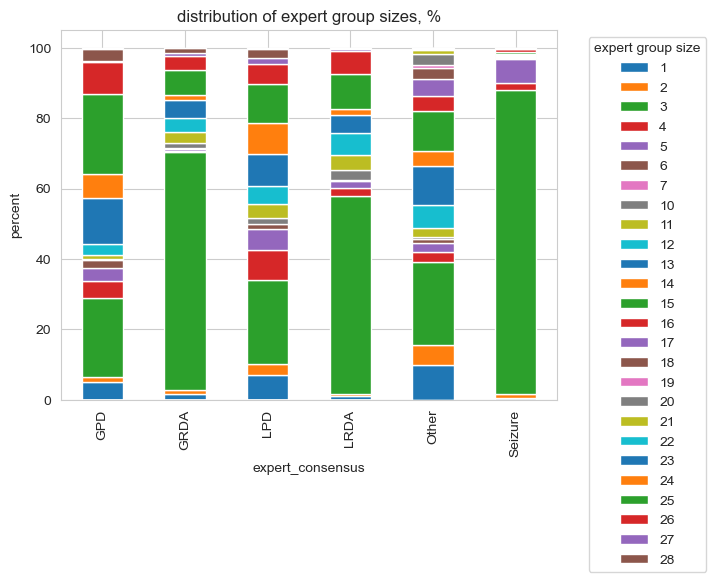

In [32]:

pivot_df=df_train.pivot_table(index='expert_consensus', columns='expert_group_size', values='eeg_id', aggfunc='count')
fig, ax = plt.subplots()
(pivot_df.div(pivot_df.sum(axis=1), axis='index')*100).plot(kind='bar', stacked=True, title='distribution of expert group sizes, %', ylabel='percent', ax=ax )
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='expert group size')
plt.show()

In the df_train_by_cat, created bellow, the difference in the feature num_distinct_exp_grp_sizes counts number of different total expert votes for eeg within category. For example, the eeg_id 2578018731 has two categories of expert consesus GRDA and other. There is a separate count num_distinct_vote_counts_by_cat for each category. Since the number of total votes within each category does not differ, for each category num_distinct_exp_grp_sizes is equal to 1. 

In [40]:
vote_cats = ["seizure_vote", "lpd_vote", "gpd_vote", "lrda_vote", "grda_vote", "other_vote"]
df_train=pd.read_csv(f'{DATA_PATH}train.csv')
df_train['expert_group_size']=df_train[vote_cats].sum(axis=1)
df_train_by_cat=df_train.copy()
df_train_by_cat['eeg_frequency_by_cat']=df_train.groupby(['eeg_id','expert_consensus']).eeg_id.transform('size')
df_train_by_cat['num_distinct_exp_grp_sizes']=df_train_by_cat.groupby(['eeg_id',  'expert_consensus']).expert_group_size.transform('nunique')

a_by_cat=['eeg_id', 'expert_group_size', 'expert_consensus', 'eeg_frequency_by_cat', 'num_distinct_exp_grp_sizes']

df_train_by_cat[a_by_cat+vote_cats].head()

,eeg_id,expert_group_size,expert_consensus,eeg_frequency_by_cat,num_distinct_exp_grp_sizes,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,3,Seizure,9,1,3,0,0,0,0,0
1,1628180742,3,Seizure,9,1,3,0,0,0,0,0
2,1628180742,3,Seizure,9,1,3,0,0,0,0,0
3,1628180742,3,Seizure,9,1,3,0,0,0,0,0
4,1628180742,3,Seizure,9,1,3,0,0,0,0,0


Summary for the instances of df_train_by_cat where num_distinct_exp_grp_sizes>1.

In [41]:
display(df_train_by_cat[df_train_by_cat.num_distinct_exp_grp_sizes>1].groupby('expert_consensus').count()['eeg_id'])
print('total '+ str(df_train_by_cat[df_train_by_cat.num_distinct_exp_grp_sizes>1].groupby('expert_consensus').count()['eeg_id'].sum()))

expert_consensus
GPD        2562
GRDA        571
LPD        4354
LRDA       1055
Other      1287
Seizure    7584
Name: eeg_id, dtype: int64

total 17413


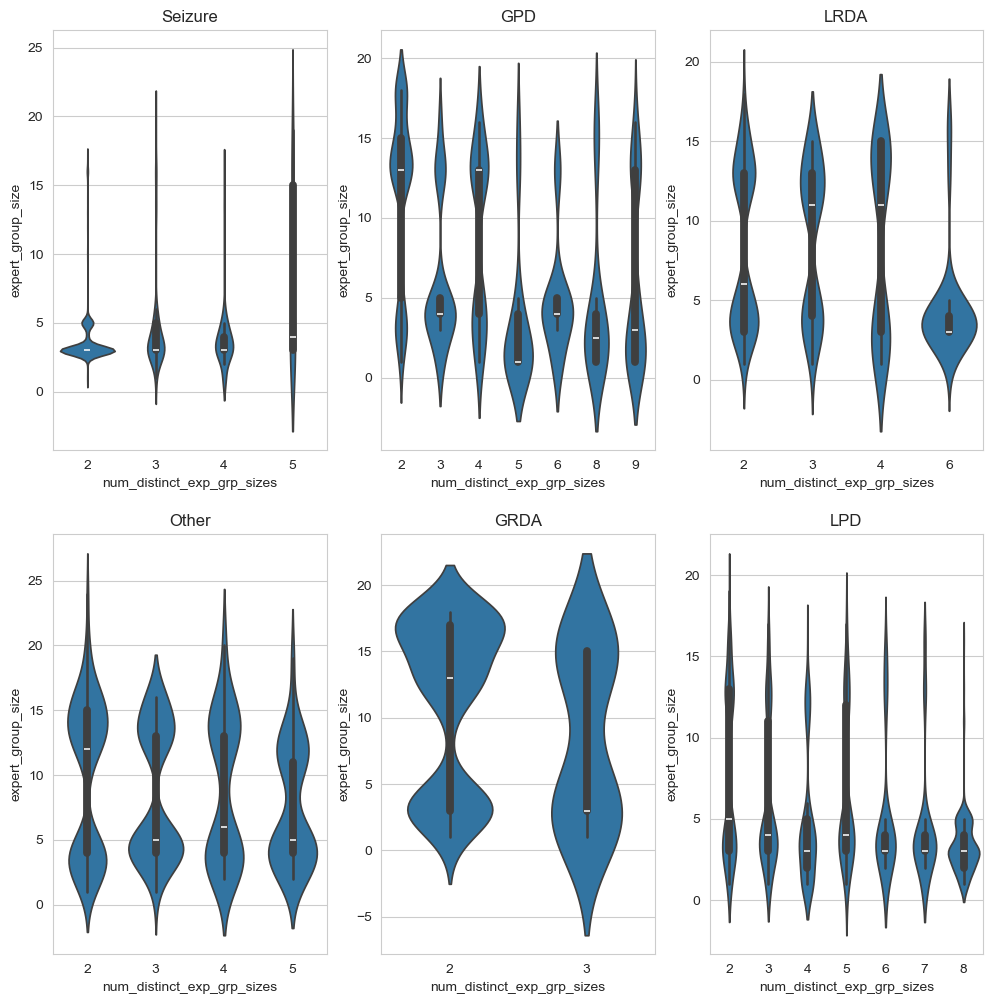

In [42]:
n=6 #num items
nrow=2
ncol=3
exp_consensus=df_train.expert_consensus.unique()
vote_cats=['seizure_vote','gpd_vote',	'lrda_vote',		'other_vote' ,	'grda_vote',	'lpd_vote']
cat=['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']

df_train_by_cat2=df_train_by_cat[df_train_by_cat.num_distinct_exp_grp_sizes>1]

fig,axs=plt.subplots(nrow, ncol, figsize=(4*3, 4*2+4))
for i, ax in enumerate(fig.axes):
    sns.violinplot(data=df_train_by_cat2[df_train_by_cat2.expert_consensus==cat[i]],x='num_distinct_exp_grp_sizes', y='expert_group_size', ax=ax)
    ax.title.set_text(cat[i])
plt.show()

In the following, we add the column diff_max_min_votes that accounts for the difference between max and min number of expert_group_size for eeg within a single category of consensus.

In [43]:
df_temp=df_train_by_cat.copy()
df_temp['diff_max_min_votes']=df_temp.groupby(['eeg_id', 'expert_consensus']).expert_group_size.transform(lambda x: x.max()-x.min())


In the following histogram, we count the number of time certain difference between max size and min size of expert size groups, by eeg by category of expert consensus. This is supposed to capture how varied the size of the expert size groups are. For example, for Seizures most expert groups differe only by 2 in size. Whereas for other categories, the sizes of groups vary a lot more. For example, for LPD and GDP significant number of eeg vary in the size of the expert groups by at least 9 experts. 

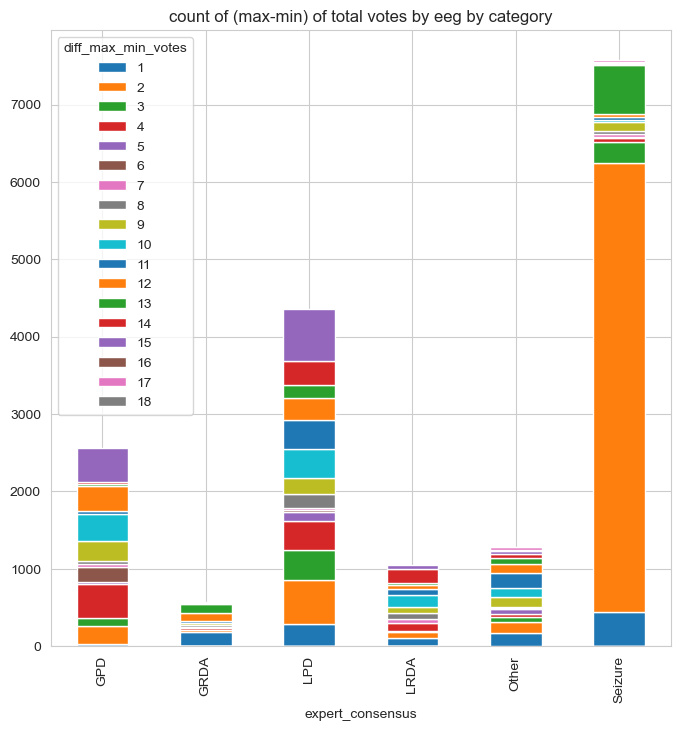

In [50]:
pivot_df=df_temp[df_temp.num_distinct_exp_grp_sizes>1].pivot_table(index='expert_consensus', columns='diff_max_min_votes', values='num_distinct_exp_grp_sizes', aggfunc='count')
fig, ax=plt.subplots(figsize=(8, 8))
pivot_df.plot( kind='bar', stacked=True, title='count of (max-min) of total votes by eeg by category', ax=ax)
plt.show()

Some of the EEG and Spectrograms have missing values. They have been previously recorded in train_with_nan_info.csv . The method to create these entries looks over each time entry of the give eeg or spectram, determines if there are any missing values (in case of eeg - for any electrode, in case of the spectrogram - for any frequency) and, if the are, adds this time entry to the count of missing values.

In [64]:
train = pd.read_csv('train_with_nan_info.csv')
train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,eeg_50sec_nan_row_count,eeg_10sec_nan_row_count,spectrogram_600sec_nan_row_count,spectrogram_10sec_nan_row_count
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,0,0,0,0


In [80]:
#total instances with missing entries (filtered by eeg)
print(f'missing more than 5/200 sec in 50 min window {len(train[train.eeg_50sec_nan_row_count>5])}')
print(f'missing more than 5/200 sec in 10 min window {len(train[train.eeg_10sec_nan_row_count>5])}')

missing more than 5/200 sec in 50 min window 235
missing more than 5/200 sec in 10 min window 39


In [83]:
#total instances with missing entries (filtered by spectrogram)
print(f'missing more than 5/200 sec in 600 min window {len(train[train.spectrogram_600sec_nan_row_count>1])}')
print(f'missing more than 5/200 sec in 10 min window {len(train[train.spectrogram_10sec_nan_row_count>1])}')

missing more than 5/200 sec in 600 min window 7702
missing more than 5/200 sec in 10 min window 145


In [143]:
#total number of instances with missing values in 10 sec eeg , 50 sec eeg, and 10 sec spectrogram
#with condition for eeg missing >5/200sec, and for spectrogram missing >2 sec
train[(train.eeg_50sec_nan_row_count>5)|(train.eeg_10sec_nan_row_count>5)|(train.spectrogram_10sec_nan_row_count>1)]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,eeg_50sec_nan_row_count,eeg_10sec_nan_row_count,spectrogram_600sec_nan_row_count,spectrogram_10sec_nan_row_count
250,3780058941,2,32.0,9661509,2,32.0,1557496608,34063,Seizure,5,0,0,0,0,0,400,0,140,0
251,3780058941,3,34.0,9661509,3,34.0,1640177051,34063,Seizure,5,0,0,0,0,0,800,0,141,0
252,3780058941,4,40.0,9661509,4,40.0,3904541855,34063,Seizure,5,0,0,0,0,0,2000,0,144,0
253,3780058941,5,42.0,9661509,5,42.0,554936882,34063,Seizure,5,0,0,0,0,0,2400,0,145,0
254,3780058941,6,44.0,9661509,6,44.0,831857057,34063,Seizure,3,0,0,0,0,0,2800,0,146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104343,3168916926,0,0.0,2081944512,3,184.0,4067217254,9364,Other,0,0,0,0,1,14,3517,0,179,1
104344,3168916926,1,2.0,2081944512,4,186.0,4019452731,9364,Other,0,0,0,0,1,14,3917,0,180,2
104345,3168916926,2,4.0,2081944512,5,188.0,2893663230,9364,Other,0,0,0,0,1,14,4317,317,181,3
104399,2551548463,0,0.0,2083642063,0,0.0,321798688,55124,Other,0,0,0,0,0,13,1200,0,258,0
